In [29]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import f_classif, mutual_info_classif, VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
np.random.seed(42)


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Allow long lines

# Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

In [30]:
# Specify the path to the CSV file in the parent directory
file_path = "../Dataset/pd_speech_features/pd_speech_features.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=',',skiprows=1)

In [31]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_entropy,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,IMF_NSR_entropy,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,mean_MFCC_9th_coef,mean_MFCC_10th_coef,mean_MFCC_11th_coef,mean_MFCC_12th_coef,mean_delta_log_energy,mean_0th_delta,mean_1st_delta,mean_2nd_delta,mean_3rd_delta,mean_4th_delta,mean_5th_delta,mean_6th_delta,mean_7th_delta,mean_8th_delta,mean_9th_delta,mean_10th_delta,mean_11th_delta,mean_12th_delta,mean_delta_delta_log_energy,mean_delta_delta_0th,mean_1st_delta_delta,mean_2nd_delta_delta,mean_3rd_delta_delta,mean_4th_delta_delta,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_Log_energy,std_MFCC_0th_coef,std_MFCC_1st_coef,std_MFCC_2nd_coef,std_MFCC_3rd_coef,std_MFCC_4th_coef,std_MFCC_5th_coef,std_MFCC_6th_coef,std_MFCC_7th_coef,std_MFCC_8th_coef,std_MFCC_9th_coef,std_MFCC_10th_coef,std_MFCC_11th_coef,std_MFCC_12th_coef,std_delta_log_energy,std_0th_delta,std_1st_delta,std_2nd_delta,std_3rd_delta,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_delta_delta_0th,std_1st_delta_delta,std_2nd_delta_delta,std_3rd_delta_delta,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,Ea,Ed_1_coef,Ed_2_coef,Ed_3_coef,Ed_4_coef,Ed_5_coef,Ed_6_coef,Ed_7_coef,Ed_8_coef,Ed_9_coef,Ed_10_coef,det_entropy_shannon_1_coef,det_entropy_shannon_2_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_6_coef,det_entropy_shannon_7_coef,det_entropy_shannon_8_coef,det_entropy_shannon_9_coef,det_entropy_shannon_10_coef,det_entropy_log_1_coef,det_entropy_log_2_coef,det_entropy_log_3_coef,det_entropy_log_4_coef,det_entropy_log_5_coef,det_entropy_log_6_coef,det_entropy_log_7_coef,det_entropy_log_8_coef,det_entropy_log_9_coef,det_entropy_log_10_coef,det_TKEO_mean_1_coef,det_TKEO_mean_2_coef,det_TKEO_mean_3_coef,det_TKEO_mean_4_coef,det_TKEO_mean_5_coef,det_TKEO_mean_6_coef,det_TKEO_mean_7_coef,det_TKEO_mean_8_coef,det_TKEO_mean_9_coef,det_TKEO_mean_10_coef,det_TKEO_std_1_coef,det_TKEO_std_2_coef,det_TKEO_std_3_coef,det_TKEO_std_4_coef,det_TKEO_std_5_coef,det_TKEO_std_6_coef,det_TKEO_std_7_coef,det_TKEO_std_8_coef,det_TKEO_std_9_coef,det_TKEO_std_10_coef,app_entropy_shannon_1_coef,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_entropy_log_1_coef,app_entropy_log_2_coef,app_entropy_log_3_coef,app_entropy_log_4_coef,app_entropy_log_5_coef,app_entropy_log_6_coef,app_entropy_log_7_coef,app_entropy_log_8_coef,app_entropy_log_9_coef,app_entropy_log_10_coef,app_det_TKEO_mean_1_coef,app_det_TKEO_mean_2_coef,app_det_TKEO_mean_3_coef,app_det_TKEO_mean_4_coef,app_det_TKEO_mean_5_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_1_coef,app_TKEO_std_2_coef,app_TKEO_

# Informação acerca do Dataset

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [33]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 756
Number of columns: 755


In [34]:
df.nunique()

id                                252
gender                              2
PPE                               740
DFA                               745
RPDE                              748
numPulses                         315
numPeriodsPulses                  319
meanPeriodPulses                  755
stdDevPeriodPulses                646
locPctJitter                      358
locAbsJitter                      543
rapJitter                         183
ppq5Jitter                        244
ddpJitter                         327
locShimmer                        734
locDbShimmer                      547
apq3Shimmer                       710
apq5Shimmer                       709
apq11Shimmer                      722
ddaShimmer                        741
meanAutoCorrHarmonicity           747
meanNoiseToHarmHarmonicity        748
meanHarmToNoiseHarmonicity        745
minIntensity                      755
maxIntensity                      755
meanIntensity                     755
f1          

In [35]:
df.isnull().sum()

id                                0
gender                            0
PPE                               0
DFA                               0
RPDE                              0
numPulses                         0
numPeriodsPulses                  0
meanPeriodPulses                  0
stdDevPeriodPulses                0
locPctJitter                      0
locAbsJitter                      0
rapJitter                         0
ppq5Jitter                        0
ddpJitter                         0
locShimmer                        0
locDbShimmer                      0
apq3Shimmer                       0
apq5Shimmer                       0
apq11Shimmer                      0
ddaShimmer                        0
meanAutoCorrHarmonicity           0
meanNoiseToHarmHarmonicity        0
meanHarmToNoiseHarmonicity        0
minIntensity                      0
maxIntensity                      0
meanIntensity                     0
f1                                0
f2                          

In [36]:
# Check if there are any null values in the entire DataFrame
any_null_in_dataframe = df.isnull().any().any()
any_null_in_dataframe

False

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1.255000e+02,7.279372e+01,0.000000e+00,6.275000e+01,1.255000e+02,1.882500e+02,2.510000e+02
gender,756.0,5.158730e-01,5.000788e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
PPE,756.0,7.462842e-01,1.692936e-01,4.155100e-02,7.628325e-01,8.096550e-01,8.343150e-01,9.076600e-01
DFA,756.0,7.004139e-01,6.971804e-02,5.435000e-01,6.470525e-01,7.005250e-01,7.549850e-01,8.526400e-01
RPDE,756.0,4.890576e-01,1.374425e-01,1.543000e-01,3.865375e-01,4.843550e-01,5.865150e-01,8.712300e-01
numPulses,756.0,3.239722e+02,9.921906e+01,2.000000e+00,2.510000e+02,3.170000e+02,3.842500e+02,9.070000e+02
numPeriodsPulses,756.0,3.226786e+02,9.940250e+01,1.000000e+00,2.500000e+02,3.160000e+02,3.832500e+02,9.050000e+02
meanPeriodPulses,756.0,6.360002e-03,1.826427e-03,2.107089e-03,5.002854e-03,6.048353e-03,7.527816e-03,1.296558e-02
stdDevPeriodPulses,756.0,3.829401e-04,7.276492e-04,1.060000e-05,4.910000e-05,7.660000e-05,1.714098e-04,3.482536e-03
locPctJitter,756.0,2.324427e-03,2.628001e-03,2.100000e-04,9.700000e-04,1.495000e-03,2.520000e-03,2.775000e-02


In [38]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1.255000e+02,7.279372e+01,0.000000e+00,6.275000e+01,1.255000e+02,1.882500e+02,2.510000e+02
gender,756.0,5.158730e-01,5.000788e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
PPE,756.0,7.462842e-01,1.692936e-01,4.155100e-02,7.628325e-01,8.096550e-01,8.343150e-01,9.076600e-01
DFA,756.0,7.004139e-01,6.971804e-02,5.435000e-01,6.470525e-01,7.005250e-01,7.549850e-01,8.526400e-01
RPDE,756.0,4.890576e-01,1.374425e-01,1.543000e-01,3.865375e-01,4.843550e-01,5.865150e-01,8.712300e-01
numPulses,756.0,3.239722e+02,9.921906e+01,2.000000e+00,2.510000e+02,3.170000e+02,3.842500e+02,9.070000e+02
numPeriodsPulses,756.0,3.226786e+02,9.940250e+01,1.000000e+00,2.500000e+02,3.160000e+02,3.832500e+02,9.050000e+02
meanPeriodPulses,756.0,6.360002e-03,1.826427e-03,2.107089e-03,5.002854e-03,6.048353e-03,7.527816e-03,1.296558e-02
stdDevPeriodPulses,756.0,3.829401e-04,7.276492e-04,1.060000e-05,4.910000e-05,7.660000e-05,1.714098e-04,3.482536e-03
locPctJitter,756.0,2.324427e-03,2.628001e-03,2.100000e-04,9.700000e-04,1.495000e-03,2.520000e-03,2.775000e-02


In [39]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'GQ_prc5_95', 'GQ_std_cycle_open', 'GQ_std_cycle_closed', 'GNE_mean', 'GNE_std', 'GNE_SNR_TKEO', 'GNE_SNR_SEO', 'GNE_NSR_TKEO', 'GNE_NSR_SEO', 'VFER_mean', 'VFER_std', 'VFER_entropy', 'VFER_SNR_TKEO', 'VFER_SNR_SEO', 'VFER_NSR_TKEO', 'VFER_NSR_SEO', 'IMF_SNR_SEO', 'IMF_SNR_TKEO', 'IMF_SNR_entropy', 'IMF_NSR_SEO', 'IMF_NSR_TKEO', 'IMF_NSR_entropy', 'mean_Log_energy', 'mean_MFCC_0th_coef', 'mean_MFCC_1st_coef', 'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_4t

# Número de Registos por Id

In [40]:
id_counts = df.groupby('id').size().reset_index(name='count')
id_counts

,id,count
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3
5,5,3
6,6,3
7,7,3
8,8,3
9,9,3


# Número de Registos por Gênero

In [41]:
gender_mapping = {0: 'Feminino', 1: 'Masculino'}
df['genderText'] = df['gender'].map(gender_mapping)

gender_counts = df['genderText'].value_counts()#.divide(3)

# Create a bar chart using Plotly Express
fig = px.bar(x=gender_counts.index, 
             y=gender_counts.values, 
             color=gender_counts.index,
             labels={'x': 'Gender', 'y': 'Número de Registos'}, 
             text=gender_counts.values,
             color_discrete_map={'Masculino': 'blue', 'Feminino': 'pink'},  # Define colors for the legend
             title='Número de registo por "Gender"')

# Show the plot
fig.show()
df = df.drop("genderText", axis=1)


In [42]:
fig = px.histogram(df, x='gender', title='Número de registo por "Gender"', labels={'Gender': 'Gender Count'})

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count',
    bargap=0.2  # Adjust the gap between bars
)

# Display the plot
fig.show()

# Número de Registos com ou sem Parkinson

In [43]:
class_mapping = {0: 'Sem doença de Parkinson', 1: 'Com doença de Parkinson'}
df['classText'] = df['class'].map(class_mapping)

class_counts = df['classText'].value_counts()
print(class_counts)

# Create a bar chart using Plotly Express
fig = px.bar(x=class_counts.index, 
             y=class_counts.values, 
             color=class_counts.index,
             labels={'x': 'Class', 'y': 'Número de Registos'}, 
             text=class_counts.values,
             color_discrete_map={'Sem doença de Parkinson': 'green', 'Com doença de Parkinson': 'red'},  # Define colors for the legend
             title='Número de registo por "Class"')

# Show the plot
fig.show()
df = df.drop("classText", axis=1)


Com doença de Parkinson    564
Sem doença de Parkinson    192
Name: classText, dtype: int64


In [44]:
fig = px.histogram(df, x='class', title='Número de registo por "Class"', labels={'Gender': 'Gender Count'})

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Parkinson Disease',
    yaxis_title='Número de Registos',
    uniformtext_minsize=8,  # Set the minimum text size
    uniformtext_mode='hide',  # Hide text when it doesn't fit
    bargap=0.2  # Adjust the gap between bars
)

# Display the plot
fig.show()

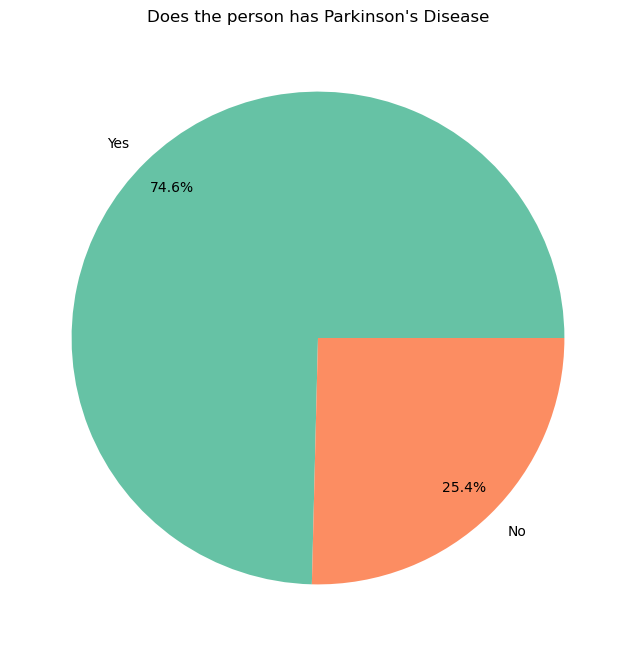

In [45]:
PALETTE = sns.color_palette("Set2")
RANDOM_STATE = 42

sizes = dict(df['class'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Does the person has Parkinson's Disease")
plt.pie(sizes.values(), labels=['Yes', 'No'], autopct="%.1f%%", pctdistance=0.85, colors=PALETTE)

plt.show()

# Target feature is unbalanced, like in most medical data, but this time we have 0 class underrepresented (no Parkinsons's Disease)



In [46]:
gender_mapping = {0: 'Masculino', 1: 'Feminino'}
df['genderText'] = df['gender'].map(gender_mapping)

grouped_df = df.groupby(['genderText', 'class']).size().divide(3).astype('int64').reset_index(name='Count')

fig = px.bar(
    grouped_df,
    x='class',
    y='Count',
    color='genderText',
    text='Count',  # Use the 'Count' column for text inside bars
    labels={'Count': 'Número de Pacientes'},
    color_discrete_map={'Masculino': 'blue', 'Feminino': 'pink'},  # Define colors for the legend
    title='Número de pacientes por "Class" e "Gender"'
)


# Add custom x-axis tick labels
class_labels = ['Sem doença de Parkinson', 'Com doença de Parkinson',]  # Replace with your custom labels
fig.update_xaxes(ticktext=class_labels, tickvals=[0, 1])

fig.update_layout(
    legend_title_text='genderText',  # Set the title for the legend
    coloraxis_colorbar_title='genderText',  # Set the title for the color legend
    uniformtext_minsize=8,  # Set the minimum text size
    uniformtext_mode='hide'  # Hide text when it doesn't fit
)

# Show the bar chart
fig.update_layout(legend_title_text='genderText')
fig.show()
df = df.drop("genderText", axis=1)




# Normalization

In [47]:
features = df.columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the features
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

In [48]:
X=df_scaled.drop('class',axis=1)
y=df_scaled['class']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [49]:
def evaluate_classifiers(X_train, y_train, X_test, y_test):
    classifiers = {
        'SVM': {
            'model': SVC(),
            'param_grid': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'param_grid': {
                'n_estimators': [100, 200, 300],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10]
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'param_grid': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]
            }
        },
        'Naive Bayes': {
            'model': GaussianNB(),
            'param_grid': {
                'priors': [None, [0.1, 0.9], [0.3, 0.7], [0.5, 0.5], [0.7, 0.3], [0.9, 0.1]]

            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'param_grid': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10]
            }
        },
        'XGBoost': {
            'model': XGBClassifier(),
            'param_grid': {
                'learning_rate': [0.1, 0.01],
                'max_depth': [3, 5, 7],
                'n_estimators': [100, 200, 300]
            }
        },
        'AdaBoost': {
            'model': AdaBoostClassifier(),
            'param_grid': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.1, 1, 10]
            }
        }
        
    }

    performance_metrics = {}

    for clf_name, clf_info in classifiers.items():
        clf = clf_info['model']
        param_grid = clf_info['param_grid']

        grid_search = GridSearchCV(clf, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        y_pred = best_clf.predict(X_test)

        #accuracy = accuracy_score(y_test, y_pred)
        #precision = precision_score(y_test, y_pred, average='weighted')
        #recall = recall_score(y_test, y_pred, average='weighted')
        #f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        performance_metrics[clf_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc':auc
        }

    return performance_metrics

In [50]:
results = evaluate_classifiers(X_train, y_train, X_test, y_test)

for clf_name, metrics in results.items():
    print(clf_name + " Performance Metrics:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1'])
    print("AUC-ROC:", metrics['auc'])
    print()

SVM Performance Metrics:
Accuracy: 0.881578947368421
Precision: 0.8692307692307693
Recall: 0.9912280701754386
F1 Score: 0.9262295081967212
AUC-ROC: 0.7719298245614035

Random Forest Performance Metrics:
Accuracy: 0.8552631578947368
Precision: 0.8650793650793651
Recall: 0.956140350877193
F1 Score: 0.9083333333333333
AUC-ROC: 0.7543859649122806

KNN Performance Metrics:
Accuracy: 0.8947368421052632
Precision: 0.9298245614035088
Recall: 0.9298245614035088
F1 Score: 0.9298245614035088
AUC-ROC: 0.8596491228070176

Naive Bayes Performance Metrics:
Accuracy: 0.7960526315789473
Precision: 0.8738738738738738
Recall: 0.8508771929824561
F1 Score: 0.8622222222222221
AUC-ROC: 0.7412280701754386

Decision Tree Performance Metrics:
Accuracy: 0.756578947368421
Precision: 0.8598130841121495
Recall: 0.8070175438596491
F1 Score: 0.832579185520362
AUC-ROC: 0.706140350877193

XGBoost Performance Metrics:
Accuracy: 0.8947368421052632
Precision: 0.8951612903225806
Recall: 0.9736842105263158
F1 Score: 0.93277

# Correlation

In [51]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any further insight.

def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [53]:
corr_features = correlation(df_scaled, 0.8)
print(len(set(corr_features)))

0.9999170455781764 numPeriodsPulses numPulses
0.8970785484311536 meanPeriodPulses numPulses
0.8965664738820922 meanPeriodPulses numPeriodsPulses
0.9668352967461922 locAbsJitter locPctJitter
0.9620116653051985 rapJitter locPctJitter
0.9520318696631049 rapJitter locAbsJitter
0.9615960062710436 ppq5Jitter locPctJitter
0.9476963417748339 ppq5Jitter locAbsJitter
0.9753360302365165 ppq5Jitter rapJitter
0.9620225016503308 ddpJitter locPctJitter
0.9520562011272272 ddpJitter locAbsJitter
0.9999961756876464 ddpJitter rapJitter
0.9753481275638751 ddpJitter ppq5Jitter
0.9958909531426109 locDbShimmer locShimmer
0.9806528908829435 apq3Shimmer locShimmer
0.9732578971803697 apq3Shimmer locDbShimmer
0.9784719354009029 apq5Shimmer locShimmer
0.972266316315152 apq5Shimmer locDbShimmer
0.9596929181533199 apq5Shimmer apq3Shimmer
0.876082995080959 apq11Shimmer locShimmer
0.8783899638303442 apq11Shimmer locDbShimmer
0.8253096526665202 apq11Shimmer apq3Shimmer
0.902068001540194 apq11Shimmer apq5Shimmer
0.9806

0.837035531113677 det_TKEO_std_8_coef Ed_8_coef
0.9988581351688787 det_TKEO_std_8_coef det_entropy_shannon_8_coef
0.8603984659346534 det_TKEO_std_8_coef det_entropy_shannon_10_coef
0.9977666034162411 det_TKEO_std_8_coef det_TKEO_mean_8_coef
0.8569568280640305 det_TKEO_std_8_coef det_TKEO_mean_10_coef
0.9783058575332504 det_TKEO_std_9_coef det_entropy_shannon_9_coef
0.9847686985576227 det_TKEO_std_9_coef det_TKEO_mean_9_coef
0.8228020131934426 det_TKEO_std_10_coef Ed_8_coef
0.8315361138816835 det_TKEO_std_10_coef Ed_10_coef
0.8632118264244967 det_TKEO_std_10_coef det_entropy_shannon_8_coef
0.9984632082655458 det_TKEO_std_10_coef det_entropy_shannon_10_coef
0.8422757692018328 det_TKEO_std_10_coef det_TKEO_mean_8_coef
0.8007191063537764 det_TKEO_std_10_coef det_TKEO_mean_9_coef
0.999066780088733 det_TKEO_std_10_coef det_TKEO_mean_10_coef
0.8673569813045957 det_TKEO_std_10_coef det_TKEO_std_8_coef
0.8628509326259953 app_entropy_shannon_1_coef numPulses
0.8617252995272693 app_entropy_shanno

0.9581152977443215 app_TKEO_std_6_coef app_entropy_shannon_1_coef
0.9623119812357109 app_TKEO_std_6_coef app_entropy_shannon_2_coef
0.9673312157104941 app_TKEO_std_6_coef app_entropy_shannon_3_coef
0.9706931237612645 app_TKEO_std_6_coef app_entropy_shannon_4_coef
0.9735859875651592 app_TKEO_std_6_coef app_entropy_shannon_5_coef
0.9751754553030866 app_TKEO_std_6_coef app_entropy_shannon_6_coef
0.9756669529515817 app_TKEO_std_6_coef app_entropy_shannon_7_coef
0.974769621403275 app_TKEO_std_6_coef app_entropy_shannon_8_coef
0.9747510972346213 app_TKEO_std_6_coef app_entropy_shannon_9_coef
0.9744940616733668 app_TKEO_std_6_coef app_entropy_shannon_10_coef
0.8425758221984602 app_TKEO_std_6_coef app_entropy_log_5_coef
0.8727296080233014 app_TKEO_std_6_coef app_entropy_log_6_coef
0.8780497205580077 app_TKEO_std_6_coef app_entropy_log_7_coef
0.8862891945936345 app_TKEO_std_6_coef app_entropy_log_8_coef
0.8864166112627504 app_TKEO_std_6_coef app_entropy_log_9_coef
0.8866356742572064 app_TKEO_st

0.8055619656736089 det_LT_entropy_log_8_coef det_entropy_log_6_coef
0.902309979684649 det_LT_entropy_log_8_coef det_entropy_log_7_coef
0.9683381680538695 det_LT_entropy_log_8_coef det_entropy_log_8_coef
0.895006196951715 det_LT_entropy_log_8_coef det_entropy_log_9_coef
0.823589671202217 det_LT_entropy_log_8_coef det_entropy_log_10_coef
0.8377527464830522 det_LT_entropy_log_8_coef det_LT_entropy_log_6_coef
0.9296299204307216 det_LT_entropy_log_8_coef det_LT_entropy_log_7_coef
0.8277222421493224 det_LT_entropy_log_9_coef det_entropy_log_7_coef
0.8882147931144707 det_LT_entropy_log_9_coef det_entropy_log_8_coef
0.9715746048402194 det_LT_entropy_log_9_coef det_entropy_log_9_coef
0.9305911238940304 det_LT_entropy_log_9_coef det_entropy_log_10_coef
0.8609860286795835 det_LT_entropy_log_9_coef det_LT_entropy_log_7_coef
0.9207865580676007 det_LT_entropy_log_9_coef det_LT_entropy_log_8_coef
0.8231657756617331 det_LT_entropy_log_10_coef det_entropy_log_8_coef
0.9328467158481782 det_LT_entropy_lo

0.8734155395584515 app_LT_entropy_shannon_1_coef app_entropy_shannon_10_coef
0.9177438787716606 app_LT_entropy_shannon_1_coef app_entropy_log_1_coef
0.9303294249148568 app_LT_entropy_shannon_1_coef app_entropy_log_2_coef
0.9530672068247789 app_LT_entropy_shannon_1_coef app_entropy_log_3_coef
0.9801073454103355 app_LT_entropy_shannon_1_coef app_entropy_log_4_coef
0.9893109027337189 app_LT_entropy_shannon_1_coef app_entropy_log_5_coef
0.9739117944593115 app_LT_entropy_shannon_1_coef app_entropy_log_6_coef
0.9650384783688501 app_LT_entropy_shannon_1_coef app_entropy_log_7_coef
0.9253506377674915 app_LT_entropy_shannon_1_coef app_entropy_log_8_coef
0.9253602143676536 app_LT_entropy_shannon_1_coef app_entropy_log_9_coef
0.9252672759430893 app_LT_entropy_shannon_1_coef app_entropy_log_10_coef
0.8288570133412342 app_LT_entropy_shannon_1_coef app_det_TKEO_mean_4_coef
0.8493979062920646 app_LT_entropy_shannon_1_coef app_det_TKEO_mean_5_coef
0.8618643883784342 app_LT_entropy_shannon_1_coef app_d

0.8987334613775918 app_LT_TKEO_mean_10_coef app_TKEO_std_7_coef
0.9177643694787079 app_LT_TKEO_mean_10_coef app_TKEO_std_8_coef
0.9165988611840487 app_LT_TKEO_mean_10_coef app_TKEO_std_9_coef
0.9220719694041414 app_LT_TKEO_mean_10_coef app_TKEO_std_10_coef
0.9383789346759692 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_1_coef
0.949794977467388 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_2_coef
0.9652456503663949 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_3_coef
0.9807780435960411 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_4_coef
0.9899033880105063 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_5_coef
0.9927157160216311 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_6_coef
0.9927545533336384 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_7_coef
0.9922759536426848 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_8_coef
0.9922683269390447 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_9_coef
0.9923045727217212 app_LT_TKEO_mean_10_coef app_LT_entropy_shannon_10_coef
0.8

0.8792434693397737 tqwt_energy_dec_7 tqwt_energy_dec_6
0.9052390125205414 tqwt_energy_dec_8 tqwt_energy_dec_7
0.8712938214813496 tqwt_energy_dec_10 tqwt_energy_dec_9
0.8165383565274584 tqwt_energy_dec_11 tqwt_energy_dec_10
0.8789718646474894 tqwt_energy_dec_13 tqwt_energy_dec_12
0.8132407766295356 tqwt_energy_dec_14 tqwt_energy_dec_13
0.8220706733802786 tqwt_energy_dec_15 tqwt_energy_dec_14
0.8177973787584485 tqwt_energy_dec_16 tqwt_energy_dec_15
0.8111827213206149 tqwt_energy_dec_30 tqwt_energy_dec_29
0.9096475996201393 tqwt_energy_dec_33 tqwt_energy_dec_32
0.8681700870629481 tqwt_energy_dec_34 tqwt_energy_dec_33
0.8640459370208101 tqwt_energy_dec_36 tqwt_energy_dec_35
0.8535782625476307 tqwt_entropy_shannon_dec_2 tqwt_entropy_shannon_dec_1
0.9210798487323889 tqwt_entropy_shannon_dec_3 tqwt_entropy_shannon_dec_2
0.8968528527754485 tqwt_entropy_shannon_dec_4 tqwt_entropy_shannon_dec_3
0.8096889454119809 tqwt_entropy_shannon_dec_5 tqwt_energy_dec_6
0.8880668959997471 tqwt_entropy_shanno

0.910729277176498 tqwt_TKEO_mean_dec_14 tqwt_entropy_shannon_dec_13
0.9229788525657989 tqwt_TKEO_mean_dec_14 tqwt_entropy_shannon_dec_14
0.8547246028342609 tqwt_TKEO_mean_dec_15 tqwt_entropy_shannon_dec_14
0.9173326989174078 tqwt_TKEO_mean_dec_15 tqwt_entropy_shannon_dec_15
0.846252560878127 tqwt_TKEO_mean_dec_16 tqwt_entropy_shannon_dec_15
0.866200870887783 tqwt_TKEO_mean_dec_16 tqwt_entropy_shannon_dec_16
0.9303969859231475 tqwt_TKEO_mean_dec_27 tqwt_entropy_shannon_dec_27
0.8638032555971694 tqwt_TKEO_mean_dec_28 tqwt_entropy_shannon_dec_28
0.8758019433263566 tqwt_TKEO_mean_dec_29 tqwt_energy_dec_29
0.8186970206230091 tqwt_TKEO_mean_dec_29 tqwt_energy_dec_30
0.9677583453503363 tqwt_TKEO_mean_dec_29 tqwt_entropy_shannon_dec_29
0.8262629165636319 tqwt_TKEO_mean_dec_30 tqwt_energy_dec_29
0.873230848917794 tqwt_TKEO_mean_dec_30 tqwt_energy_dec_30
0.9640093616419593 tqwt_TKEO_mean_dec_30 tqwt_entropy_shannon_dec_29
0.9735452613084504 tqwt_TKEO_mean_dec_30 tqwt_TKEO_mean_dec_29
0.845799365

0.8037142893688581 tqwt_meanValue_dec_33 tqwt_entropy_shannon_dec_32
0.8026848800714889 tqwt_meanValue_dec_33 tqwt_entropy_shannon_dec_33
0.8492058887239723 tqwt_meanValue_dec_33 tqwt_TKEO_mean_dec_32
0.8442692464314699 tqwt_meanValue_dec_33 tqwt_TKEO_mean_dec_33
0.8446139142731878 tqwt_meanValue_dec_33 tqwt_TKEO_std_dec_32
0.8554659168552222 tqwt_meanValue_dec_33 tqwt_TKEO_std_dec_33
0.8818739777770949 tqwt_meanValue_dec_36 tqwt_medianValue_dec_36
0.9461361614898733 tqwt_stdValue_dec_1 tqwt_entropy_shannon_dec_1
0.8234257735214098 tqwt_stdValue_dec_1 tqwt_entropy_shannon_dec_2
0.9040917806811217 tqwt_stdValue_dec_1 tqwt_TKEO_mean_dec_1
0.8032741134798727 tqwt_stdValue_dec_1 tqwt_TKEO_mean_dec_2
0.8166386244998451 tqwt_stdValue_dec_2 tqwt_entropy_shannon_dec_1
0.9439249455042834 tqwt_stdValue_dec_2 tqwt_entropy_shannon_dec_2
0.8655346539794072 tqwt_stdValue_dec_2 tqwt_entropy_shannon_dec_3
0.909218360432941 tqwt_stdValue_dec_2 tqwt_TKEO_mean_dec_2
0.8212869711276257 tqwt_stdValue_dec_2

0.838747527353522 tqwt_stdValue_dec_19 tqwt_entropy_log_dec_19
0.902490582395874 tqwt_stdValue_dec_19 tqwt_TKEO_mean_dec_19
0.827480861085544 tqwt_stdValue_dec_19 tqwt_TKEO_std_dec_18
0.9152969192126417 tqwt_stdValue_dec_19 tqwt_TKEO_std_dec_19
0.8651305033843476 tqwt_stdValue_dec_19 tqwt_stdValue_dec_18
0.8811477616016182 tqwt_stdValue_dec_20 tqwt_entropy_shannon_dec_20
0.8299874931080998 tqwt_stdValue_dec_20 tqwt_entropy_log_dec_20
0.8841330464750974 tqwt_stdValue_dec_20 tqwt_TKEO_mean_dec_20
0.8061773774581702 tqwt_stdValue_dec_20 tqwt_TKEO_std_dec_20
0.8010539689320497 tqwt_stdValue_dec_20 tqwt_stdValue_dec_19
0.8330071352380685 tqwt_stdValue_dec_21 tqwt_entropy_shannon_dec_21
0.8295791306102452 tqwt_stdValue_dec_21 tqwt_entropy_log_dec_21
0.8751230675388889 tqwt_stdValue_dec_21 tqwt_TKEO_mean_dec_21
0.834937634405194 tqwt_stdValue_dec_21 tqwt_TKEO_std_dec_21
0.9086639413661561 tqwt_stdValue_dec_22 tqwt_entropy_shannon_dec_22
0.8209949061379392 tqwt_stdValue_dec_22 tqwt_entropy_log

0.8656459395017334 tqwt_minValue_dec_24 tqwt_TKEO_mean_dec_24
0.8818248987100014 tqwt_minValue_dec_24 tqwt_TKEO_std_dec_24
0.9542707084300408 tqwt_minValue_dec_24 tqwt_stdValue_dec_24
0.8249532728299447 tqwt_minValue_dec_24 tqwt_minValue_dec_23
0.8811748847924763 tqwt_minValue_dec_25 tqwt_TKEO_mean_dec_25
0.8864477702193639 tqwt_minValue_dec_25 tqwt_TKEO_std_dec_25
0.9692118310367401 tqwt_minValue_dec_25 tqwt_stdValue_dec_25
0.888757531176952 tqwt_minValue_dec_26 tqwt_TKEO_mean_dec_26
0.8978976580155682 tqwt_minValue_dec_26 tqwt_TKEO_std_dec_26
0.968275990839356 tqwt_minValue_dec_26 tqwt_stdValue_dec_26
0.8608898912165768 tqwt_minValue_dec_27 tqwt_TKEO_mean_dec_27
0.8860723397154605 tqwt_minValue_dec_27 tqwt_TKEO_std_dec_27
0.969809609923488 tqwt_minValue_dec_27 tqwt_stdValue_dec_27
0.8715875329903225 tqwt_minValue_dec_28 tqwt_TKEO_mean_dec_28
0.8513132252882031 tqwt_minValue_dec_28 tqwt_TKEO_std_dec_28
0.9626423897238703 tqwt_minValue_dec_28 tqwt_stdValue_dec_28
0.8356438159129689 tqw

0.8091871017147522 tqwt_maxValue_dec_23 tqwt_TKEO_std_dec_23
0.9245687523748526 tqwt_maxValue_dec_23 tqwt_stdValue_dec_23
0.9935633531921153 tqwt_maxValue_dec_23 tqwt_minValue_dec_23
0.8222824957027479 tqwt_maxValue_dec_23 tqwt_minValue_dec_24
0.8645075952564427 tqwt_maxValue_dec_24 tqwt_TKEO_mean_dec_24
0.8800837362248781 tqwt_maxValue_dec_24 tqwt_TKEO_std_dec_24
0.9581932554717857 tqwt_maxValue_dec_24 tqwt_stdValue_dec_24
0.8203870721764863 tqwt_maxValue_dec_24 tqwt_minValue_dec_23
0.9970543000366953 tqwt_maxValue_dec_24 tqwt_minValue_dec_24
0.8206914892275106 tqwt_maxValue_dec_24 tqwt_maxValue_dec_23
0.8819982072819629 tqwt_maxValue_dec_25 tqwt_TKEO_mean_dec_25
0.8856707764312456 tqwt_maxValue_dec_25 tqwt_TKEO_std_dec_25
0.9704541256698909 tqwt_maxValue_dec_25 tqwt_stdValue_dec_25
0.9975929246070141 tqwt_maxValue_dec_25 tqwt_minValue_dec_25
0.8880362207991178 tqwt_maxValue_dec_26 tqwt_TKEO_mean_dec_26
0.8964738006643158 tqwt_maxValue_dec_26 tqwt_TKEO_std_dec_26
0.9670191819636477 tq

0.9278544485918929 tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_31
0.8413645743351071 tqwt_kurtosisValue_dec_33 tqwt_kurtosisValue_dec_31
0.945107271220739 tqwt_kurtosisValue_dec_33 tqwt_kurtosisValue_dec_32
0.8246203777960783 tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_33
0.9480081841938505 tqwt_kurtosisValue_dec_35 tqwt_kurtosisValue_dec_34
0.8666963044941641 tqwt_kurtosisValue_dec_36 tqwt_kurtosisValue_dec_35
492


In [55]:
df_scaled_correlated = df_scaled
df_scaled_correlated.drop(labels=corr_features, axis=1, inplace=True)

df_scaled_correlated.shape

(756, 263)

In [56]:
X=df_scaled_correlated.drop('class',axis=1)
y=df_scaled['class']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

results = evaluate_classifiers(X_train, y_train, X_test, y_test)

for clf_name, metrics in results.items():
    print(clf_name + " Performance Metrics:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1'])
    print("AUC-ROC:", metrics['auc'])
    print()

SVM Performance Metrics:
Accuracy: 0.8486842105263158
Precision: 0.8582677165354331
Recall: 0.956140350877193
F1 Score: 0.9045643153526972
AUC-ROC: 0.7412280701754387

Random Forest Performance Metrics:
Accuracy: 0.8618421052631579
Precision: 0.849624060150376
Recall: 0.9912280701754386
F1 Score: 0.9149797570850202
AUC-ROC: 0.7324561403508771

KNN Performance Metrics:
Accuracy: 0.9407894736842105
Precision: 0.9338842975206612
Recall: 0.9912280701754386
F1 Score: 0.9617021276595745
AUC-ROC: 0.8903508771929824

Naive Bayes Performance Metrics:
Accuracy: 0.756578947368421
Precision: 0.8811881188118812
Recall: 0.7807017543859649
F1 Score: 0.8279069767441861
AUC-ROC: 0.7324561403508771

Decision Tree Performance Metrics:
Accuracy: 0.7828947368421053
Precision: 0.8785046728971962
Recall: 0.8245614035087719
F1 Score: 0.8506787330316742
AUC-ROC: 0.7412280701754387

XGBoost Performance Metrics:
Accuracy: 0.8618421052631579
Precision: 0.8604651162790697
Recall: 0.9736842105263158
F1 Score: 0.913

# PCA

In [57]:
pca = PCA(n_components=0.95).fit(X_train.drop(columns='gender'))
pca_train_data = pca.transform(X_train.drop(columns='gender'))
pca_test_data = pca.transform(X_test.drop(columns='gender'))

X_train_pca = pd.DataFrame.from_records(data=pca_train_data)

#reset index to map id and gender to pca data (train)
#X_train_female.reset_index(inplace=True)
#X_train_pca_female['gender'] = X_train_female['gender']

X_test_pca = pd.DataFrame.from_records(data=pca_test_data)

#reset index to map id and gender to pca data (test)
#X_test_female.reset_index(inplace=True)
#X_test_pca_female['gender'] = X_test_female['gender']

results_female = evaluate_classifiers(X_train_pca, y_train, X_test_pca, y_test)

for clf_name, metrics in results_female.items():
    print(clf_name + " Performance Metrics:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1'])
    print("AUC-ROC:", metrics['auc'])
    print()


SVM Performance Metrics:
Accuracy: 0.8881578947368421
Precision: 0.8818897637795275
Recall: 0.9824561403508771
F1 Score: 0.929460580912863
AUC-ROC: 0.7938596491228069

Random Forest Performance Metrics:
Accuracy: 0.8026315789473685
Precision: 0.795774647887324
Recall: 0.9912280701754386
F1 Score: 0.8828125
AUC-ROC: 0.6140350877192983

KNN Performance Metrics:
Accuracy: 0.9078947368421053
Precision: 0.9032258064516129
Recall: 0.9824561403508771
F1 Score: 0.9411764705882352
AUC-ROC: 0.8333333333333333

Naive Bayes Performance Metrics:
Accuracy: 0.7368421052631579
Precision: 0.8303571428571429
Recall: 0.8157894736842105
F1 Score: 0.8230088495575222
AUC-ROC: 0.6578947368421053

Decision Tree Performance Metrics:
Accuracy: 0.8355263157894737
Precision: 0.8503937007874016
Recall: 0.9473684210526315
F1 Score: 0.896265560165975
AUC-ROC: 0.7236842105263157

XGBoost Performance Metrics:
Accuracy: 0.8618421052631579
Precision: 0.8604651162790697
Recall: 0.9736842105263158
F1 Score: 0.913580246913